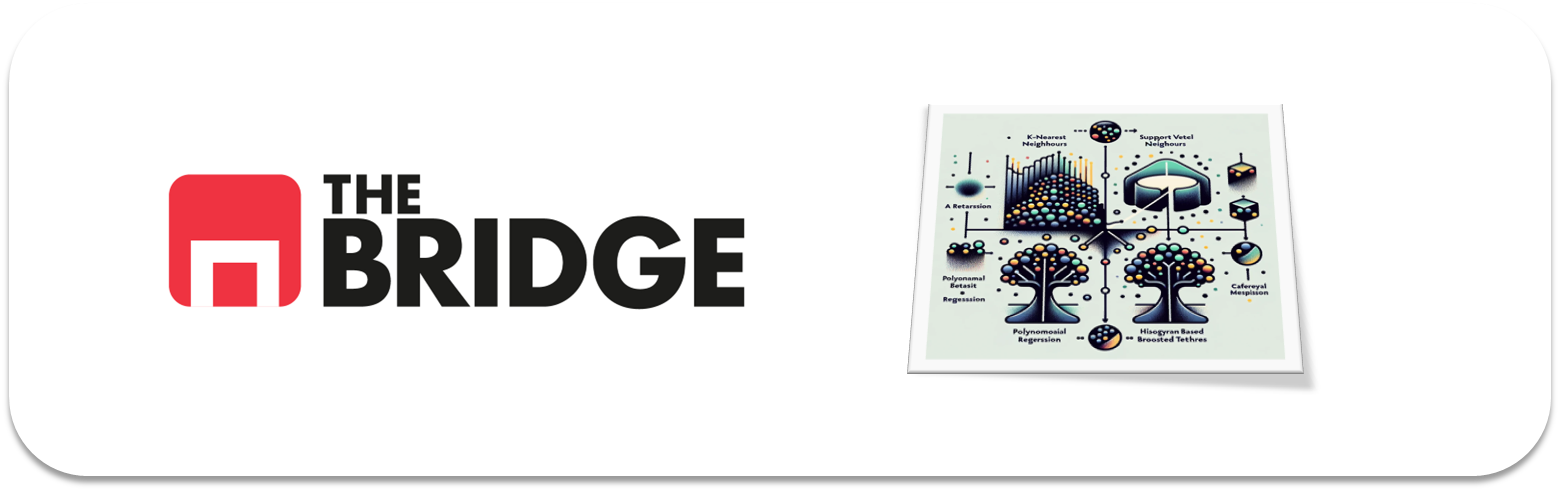

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet









In [ ]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.
    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")
    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')
    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
target_clas = "quality"
target_reg = "alcohol"

df[target_clas] = df[target_clas] - min(df[target_clas]) # cambiamos a 0.1.2.3.4.5.6




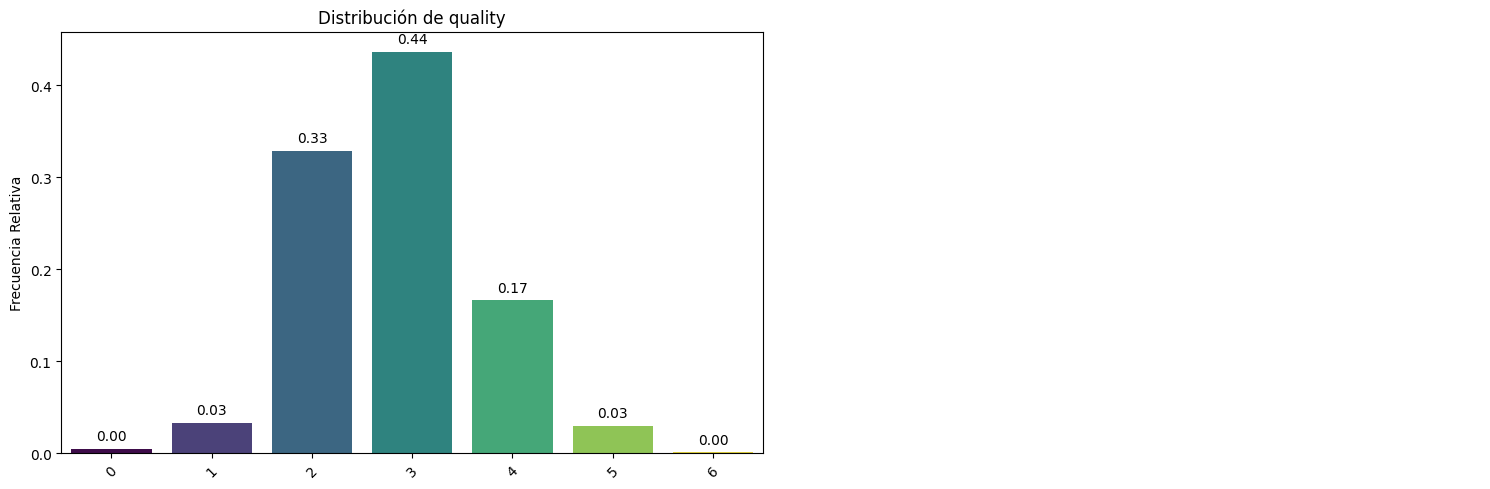

In [38]:
bt.pinta_distribucion_categoricas(df, [target_clas], mostrar_valores=True, relativa=True)

<Axes: >

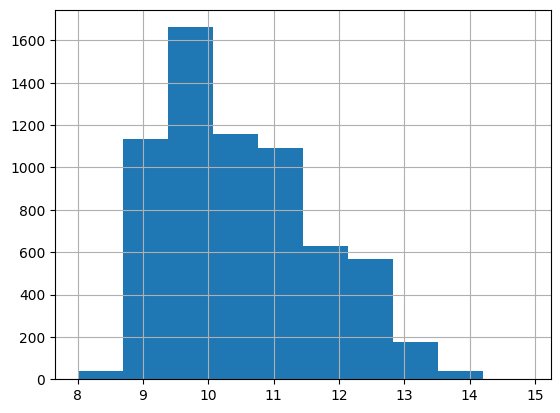

In [39]:
df.alcohol.hist()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [7]:
# Modelo desbalanceado con 2 y 3 como quality 77% del total

In [8]:
features= df.columns.to_list()


train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)


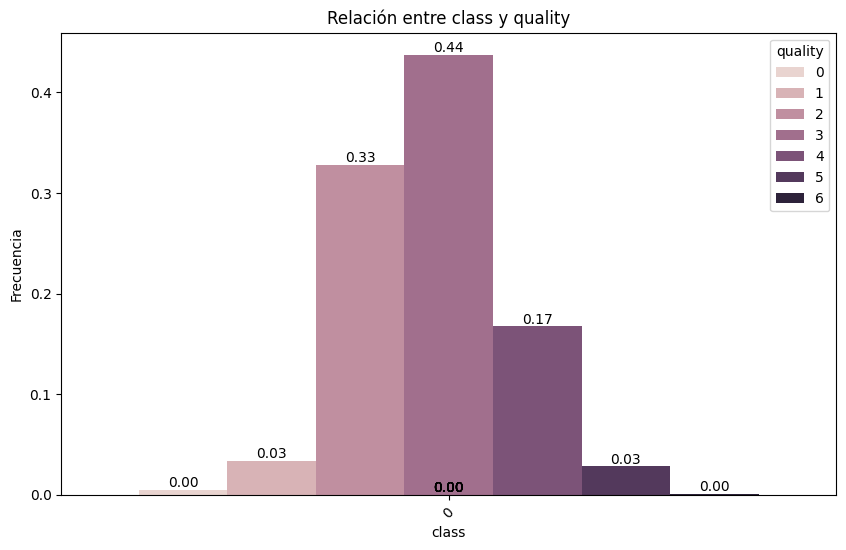

In [41]:
bt.plot_categorical_relationship_fin(train_set, "class", target_clas, show_values=True, relative_freq=True)

In [ ]:
bt.plot_grouped_histograms()

In [40]:
# Ejemplo: Si la columna 'class' tiene valores 'positivo' y 'negativo'
train_set['class'] = train_set['class'].apply(lambda x: 1 if x == 'positivo' else 0)
test_set['class'] = test_set['class'].apply(lambda x: 1 if x == 'positivo' else 0)


In [10]:
features= train_set.columns.to_list()

In [11]:
len(features)

13

In [12]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,2,0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,3,0
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,3,0
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,3,0
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,2,0
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,2,0
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,4,0
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,5,0


In [13]:
test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
3103,7.4,0.320,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,2,0
1419,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,4,0
4761,6.4,0.320,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,5,0
4690,6.8,0.230,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,3,0
4032,6.7,0.340,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,2,0
2850,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,1,0
4917,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1,4,0
5198,6.2,0.460,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.4,2,0


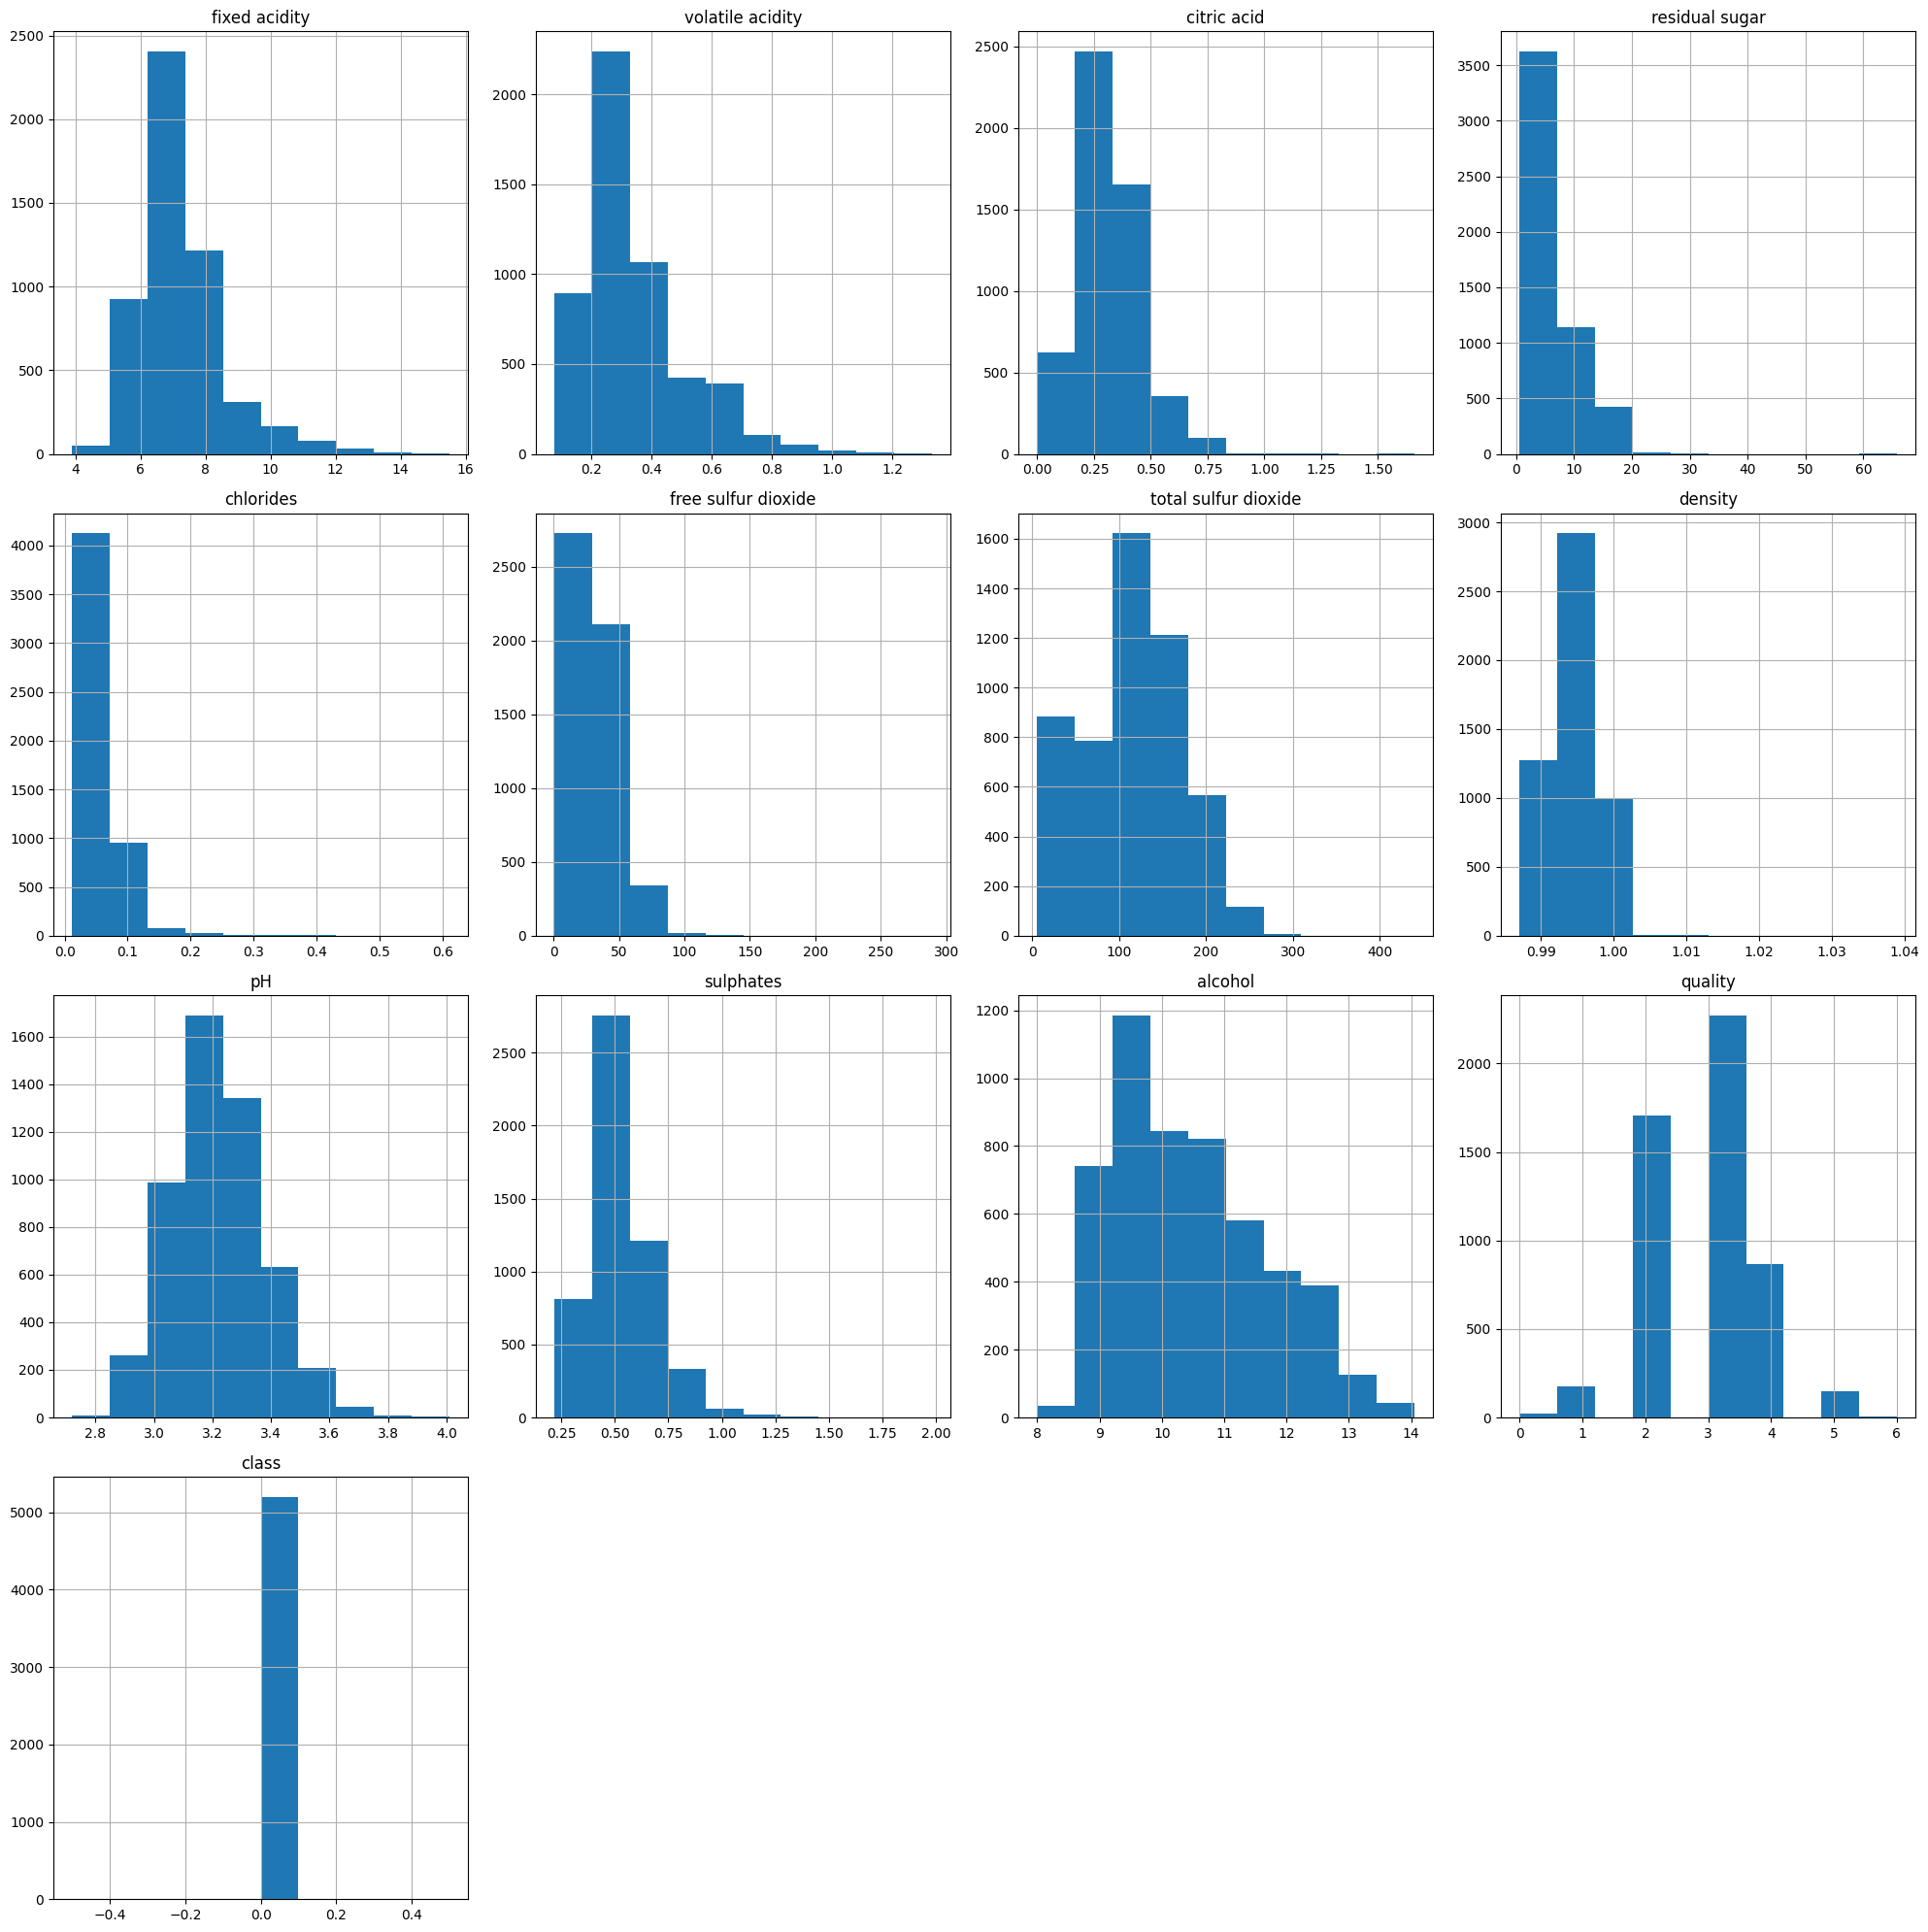

In [42]:
train_set[features].hist(figsize = (20,20))
plt.tight_layout()

(13, 2)


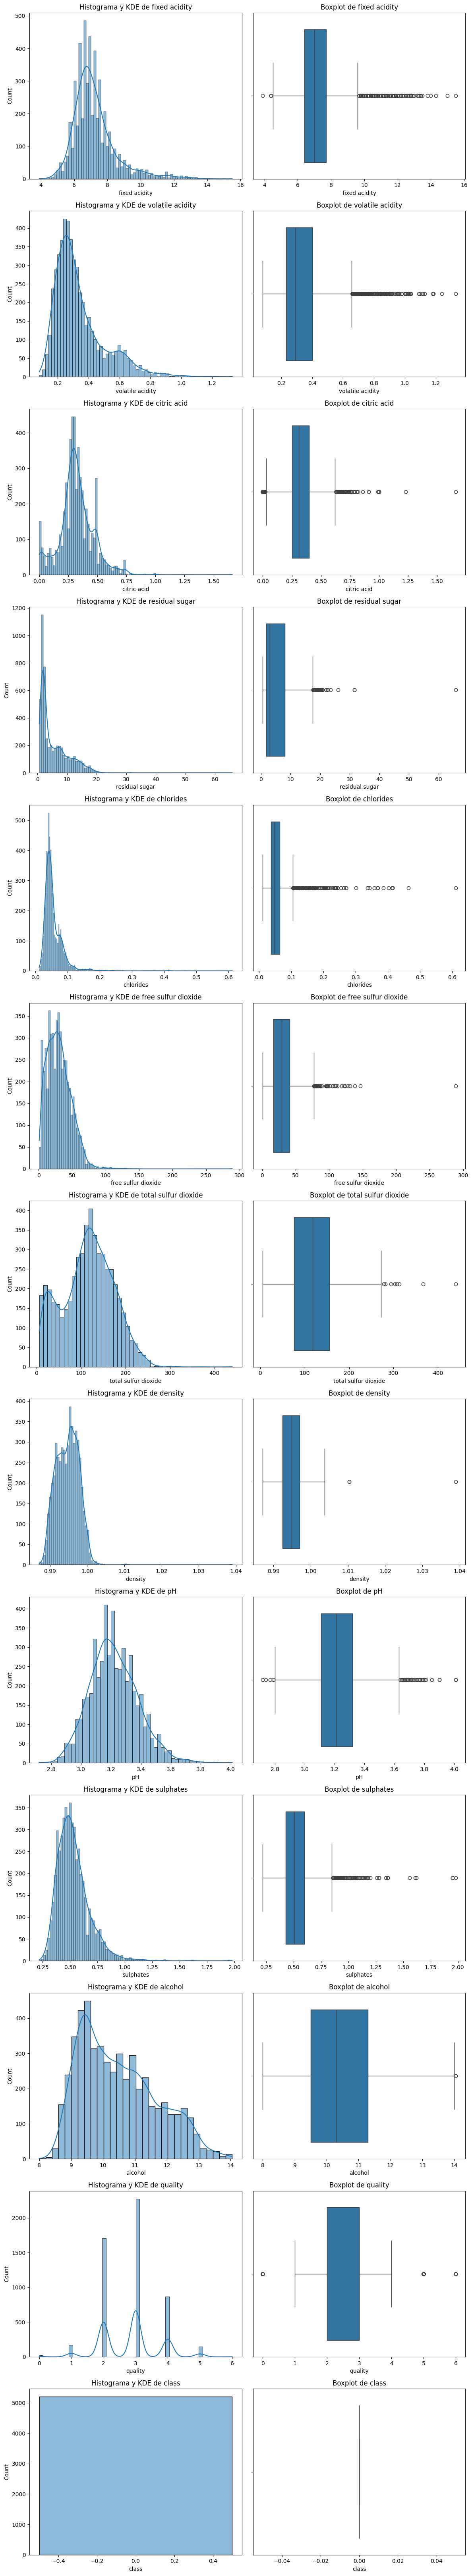

In [15]:
bt.plot_combined_graphs(train_set, features)

In [16]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

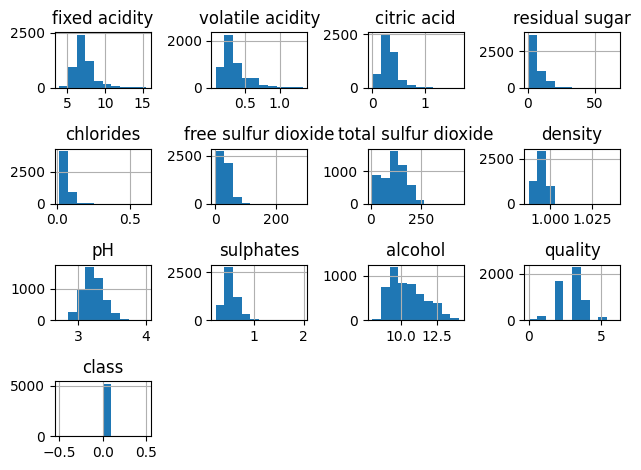

In [17]:
train_set[features].hist()
plt.tight_layout()

In [18]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [ ]:
for col in features_to_transform:
    desplaza = 0
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

In [19]:
for col in features:
    train_set_scaled[col] = np.log(train_set_scaled[col]+1)
    test_set_scaled[col] = np.log(test_set_scaled[col]+1)

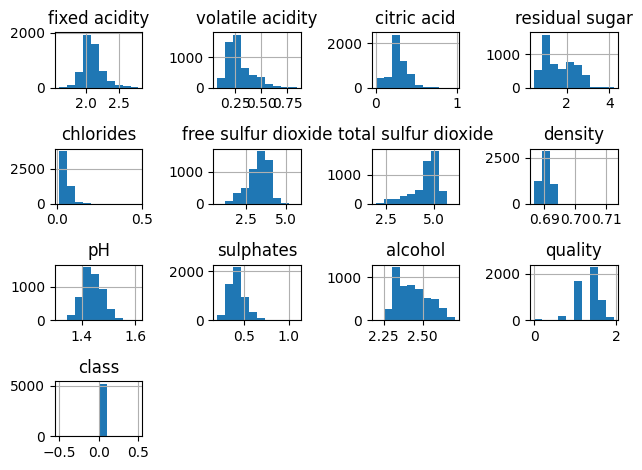

In [20]:
train_set_scaled[features].hist()
plt.tight_layout()

In [21]:
scaler = StandardScaler()

train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [22]:
train_set_scaled



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,0.628672,-1.055154,0.592888,-0.675439,-0.205494,0.603446,-0.505241,0.427700,0.706744,2.584726,0.720172,-0.871751,0.0
947,-0.019564,-1.055154,2.560877,1.736215,-0.370242,0.820606,0.855001,1.621578,1.011233,0.998990,-1.312752,0.305590,0.0
877,0.392680,1.111998,-0.505652,-1.224341,-0.502610,-1.317236,0.112504,-0.901360,-1.066182,-1.830435,0.312635,0.305590,0.0
2927,-1.024081,-0.548692,-0.218268,0.789749,-0.074260,0.564028,0.448623,0.059153,-1.000780,-0.177558,-0.927596,0.305590,0.0
6063,1.430708,0.320822,0.657314,-0.586628,1.525362,-2.003136,-3.095378,0.440977,-0.547423,0.391872,1.187890,1.218808,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.641625,-0.619281,1.217401,1.332323,-0.271299,1.282255,1.111562,0.626829,-0.228277,0.322290,-1.022479,-0.871751,0.0
5191,-0.458083,-0.762183,-0.218268,1.383730,0.089083,-0.011858,0.371746,1.276901,1.431729,-0.549087,-0.927596,-0.871751,0.0
5226,-0.458083,-0.907448,0.462643,0.823045,-0.107022,0.255061,0.581225,-0.003952,0.645425,0.252264,0.477685,1.218808,0.0
5390,0.148308,0.509824,-0.147825,-0.871054,-0.768879,0.045414,-0.365924,-1.936549,-1.662178,-1.332210,1.991478,1.964961,0.0


In [23]:

X_train = train_set.drop(columns=[target_clas])
X_train_scaled = train_set_scaled.drop(columns=[target_clas])
y_train = train_set[target_clas]

X_test = test_set.drop(columns=[target_clas])
X_test_scaled = test_set_scaled.drop(columns=[target_clas])
y_test = test_set[target_clas]

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors=7)

knn_clf.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=7)

In [25]:
print(classification_report(y_train, knn_clf.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.51      0.20      0.28       173
           2       0.67      0.73      0.70      1706
           3       0.66      0.73      0.69      2274
           4       0.65      0.55      0.60       869
           5       0.61      0.12      0.20       146
           6       0.00      0.00      0.00         5

    accuracy                           0.66      5197
   macro avg       0.59      0.34      0.37      5197
weighted avg       0.66      0.66      0.65      5197



c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [26]:
knn_clf_2 = KNeighborsClassifier(n_neighbors=13)

knn_clf_2.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [27]:
print(classification_report(y_train, knn_clf_2.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.70      0.09      0.16       173
           2       0.65      0.71      0.68      1706
           3       0.62      0.71      0.66      2274
           4       0.58      0.47      0.52       869
           5       0.44      0.05      0.09       146
           6       0.00      0.00      0.00         5

    accuracy                           0.63      5197
   macro avg       0.43      0.29      0.30      5197
weighted avg       0.62      0.63      0.61      5197



c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
modelos = ["KNN", "Logistic", "RandomF", "XGBoost", "LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter= 10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth=5, random_state=42, verbose=-100, n_jobs=-1)

for nombre, modelo in zip(modelos, [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end= " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv=5, scoring="recall_macro"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring="recall_macro"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.25768794955547736
Para Logistic: 0.2231267065720468
Para RandomF: 0.21396476777715265
Para XGBoost: 0.3286091182493108
Para LightGBM: 0.31332688510614604


In [ ]:
# Instanciamos modelos
knn_clf = KNeighborsClassifier(n_neighbors= 5)
knn_ten_clf = KNeighborsClassifier(n_neighbors= 10)
lr_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier(max_depth = 10, random_state= 42)
lgb_clf = LGBMClassifier(max_depth = 10, random_state = 42, verbose = -100)
modelos_clf = {
    "KNN_5": knn_clf,
    "KNN_10": knn_ten_clf,
    "Regresion Logistica": lr_clf,
    "Random Forest": rf_clf,
    "LightGBM": lgb_clf
}

In [29]:
# Equilibrado (oversampling con SMOTE)

smote = SMOTE(random_state=42, k_neighbors=4)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train)

In [30]:
modelos = ["KNN", "Logistic", "RandomF", "XGBoost", "LightGBM"]
metricas = []

lr_clf = LogisticRegression(max_iter= 10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth=5, random_state=42, verbose=-100, n_jobs=-1)

for nombre, modelo in zip(modelos, [knn_clf, lr_clf, rf_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end= " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_smote, y_train_smote, cv=5, scoring="recall_macro"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_smote_scaled, y_train_smote_scaled, cv=5, scoring="recall_macro"))
    print(metrica)
    metricas.append(metrica)

Para KNN: 0.8214694430805192
Para Logistic: 0.5008148050816396
Para RandomF: 0.6060449933955283
Para XGBoost: 0.8529345292844349
Para LightGBM: 0.8240961555750731


In [31]:
#Ajuste hiperparametros con XGBoost: 


# Definir los parámetros que deseas ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='recall_macro', verbose=2, n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor recall medio:", grid_search.best_score_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Mejor recall medio: 0.34689549193945257


In [32]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.64      0.21      0.32        43
           2       0.75      0.72      0.74       432
           3       0.67      0.78      0.72       562
           4       0.64      0.57      0.60       210
           5       0.86      0.51      0.64        47

    accuracy                           0.69      1300
   macro avg       0.59      0.46      0.50      1300
weighted avg       0.69      0.69      0.69      1300



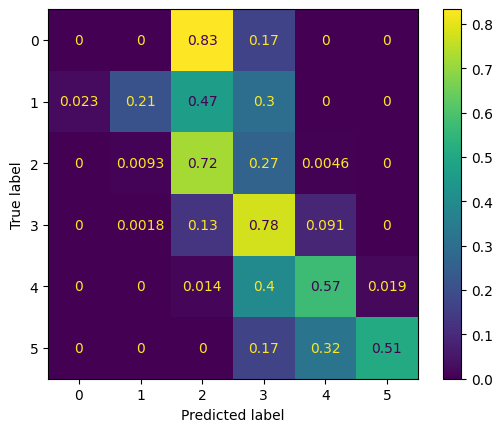

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_search.best_estimator_.predict(X_test), normalize="true");

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [34]:
target_reg = "alcohol"

In [35]:
X_train_2 = train_set.drop(columns=[target_reg])
X_train_scaled_2 = train_set_scaled.drop(columns=[target_reg])
y_train_2 = train_set[target_reg]

X_test_2 = test_set.drop(columns=[target_reg])
X_test_scaled_2 = test_set_scaled.drop(columns=[target_reg])
y_test_2 = test_set[target_reg]

In [36]:


knn_rg = KNeighborsRegressor(n_neighbors=7)

knn_rg.fit(X_train_scaled_2, y_train_2)

KNeighborsRegressor(n_neighbors=7)

In [37]:
### train_error

pred_train = knn_rg.predict(X_train_scaled_2)

print("MAE:", median_absolute_error(y_train_2, pred_train))
print("RMSE:", root_mean_squared_error(y_train_2, pred_train))
print("R^2:", lin_reg.score(X_train_scaled_2, y_train_2))

MAE: 0.27142857142857046
RMSE: 0.5054802935511109


NameError: name 'lin_reg' is not defined

In [336]:


modelos = ["KNN", "Linear", "RandomF", "XGBoost", "LightGBM"]
metricas = []

knn_rg = KNeighborsRegressor(n_neighbors=5)
lr_rg = LinearRegression()
rf_rg = RandomForestRegressor(max_depth=5, random_state=42)
xgb_rg = XGBRegressor(max_depth=5, random_state=42)
lgb_rg = LGBMRegressor(max_depth=5, random_state=42, verbose=-100, n_jobs=-1)

for nombre, modelo in zip(modelos, [knn_rg, lr_rg, rf_rg, xgb_rg, lgb_rg]):
    print(f"Para {nombre}:", end=" ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_2, y_train_2, cv=5, scoring="neg_mean_absolute_error"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_scaled_2, y_train_2, cv=5, scoring="neg_mean_absolute_error"))
    print(-metrica)  # Invertir la métrica para tener un valor positivo
    metricas.append(-metrica)


Para KNN: 0.4440824821697391
Para Linear: 0.4211254749833973
Para RandomF: 0.4729082494341381
Para XGBoost: 0.2877554514952966
Para LightGBM: 0.30876308219359794


In [341]:
# Me quedo con XGBoost porque tiene menor MAE

#Ajuste hiperparametros con XGBoost: 


from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Suponiendo que ya tienes X_train_2, y_train_2, X_test_2, y_test_2 y están escalados

# Definir los parámetros que deseas ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_rg = XGBRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_rg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train_scaled_2, y_train_2)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Crear el modelo con los mejores parámetros
xgb_best = XGBRegressor(**best_params, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
xgb_best.fit(X_train_scaled_2, y_train_2)

# Hacer predicciones en el conjunto de test
y_pred_test = xgb_best.predict(X_test_scaled_2)

# Evaluar el modelo
mae = mean_absolute_error(y_test_2, y_pred_test)
rmse = mean_squared_error(y_test_2, y_pred_test, squared=False)
r2 = r2_score(y_test_2, y_pred_test)

print("Resultados en el conjunto de test:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Resultados en el conjunto de test:
MAE: 0.23028111042120522
RMSE: 0.3579011593851978
R^2: 0.909108212537348


c:\Users\josel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
